(example_flap_dataobject_from_numpy_array)=

# Creating FLAP data object directly from `numpy` array

In most cases, for measurement data from a certain data source or for simple test data, the [flap.get_data()](#flap.data_object.get_data) method should be used. However, in some cases, it can be useful to create `flap` data objects directly from a `numpy` array. This example shows a simple example for a one-dimensional dataset with equidistant time coordinates. [^download]

[^download]: This notebook can be downloaded as **{download}`flap_dataobject_from_numpy_array.ipynb`**

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Fix the random seed
np.random.seed(1234)

In [2]:
import flap

Default location of configuration file is working directory.
INIT flap storage


Create time sampling parameters and the time vector

In [3]:
dt = 0.002
t_start = 0.0

t_end = 100
t = np.arange(t_start, t_end, dt)

The data itself (sum of two sine signals with additive white noise)

In [4]:
signal1 = np.sin(2*np.pi*t)
signal2 = 0.5 * np.sin(2.8 * 2*np.pi*t)
noise = 0.5*(np.random.random(size=len(t)) - 0.5)
                         
data_array = signal1 + signal2 + noise

Data units for the data must be defined to store it in a `flap` data object.

In [5]:
data_unit = flap.coordinate.Unit(name='Signal', unit='Volt')

The data must also have coordinates associated. Since here the sampling is uniform (i.e. the coordinate is equidistant), only the start time and the increment is stored instead of storing the entire time vector. This is specified in a [flap.coordinate.CoordinateMode](#flap.coordinate.CoordinateMode) object. The `dimension_list` parameter specifies the dimensions of the data associated with these coordinates.

For more details, see the corresponding sections of the [User's Guide](#users-guide-coordinates-in-flap) and the [API Reference](#flap.coordinate).

In [6]:
coordinate_mode = flap.coordinate.CoordinateMode(equidistant=True)

data_coords = flap.coordinate.Coordinate(
    name='Time',
    unit='Second',
    mode=coordinate_mode,
    shape=[],
    start=t_start,
    step=dt,
    dimension_list=[0],
)

Now, the data object can be created with the associated data, data units and coordinates:

In [7]:
d = flap.DataObject(
    data_array=data_array,
    data_unit=data_unit,
    coordinates=data_coords
)

All `flap` features can now be used on this data object. Some examples:

Plotting:

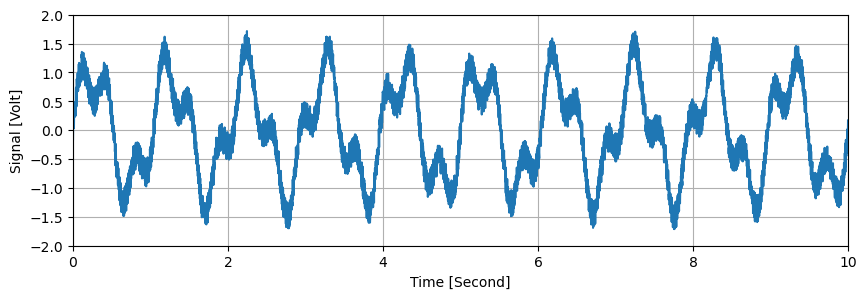

In [8]:
plt.figure(figsize=(10,3))

d.plot(options={'All points': True})

plt.xlim(0,10)
plt.ylim(-2,2)
plt.grid()

plt.show()

Auto-power spectral density:

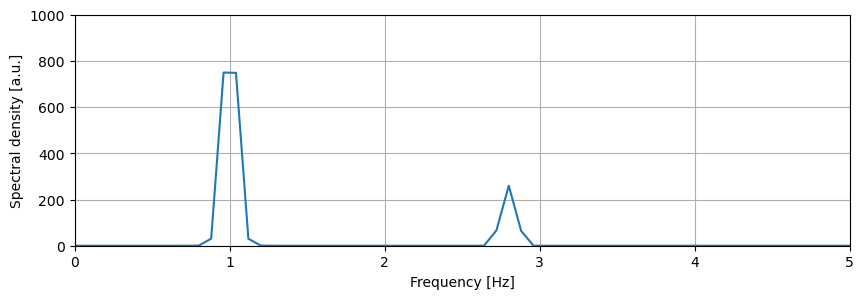

In [9]:
d_apsd = d.apsd()

# Plot the APSD
plt.figure(figsize=(10,3))

d_apsd.plot()

plt.xlim(0,5)
plt.ylim(0,1000)
plt.grid()

plt.show()

Saving and loading the data object as a pickled object:

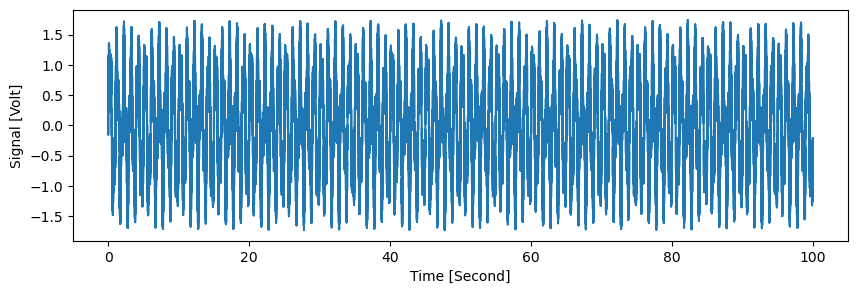

In [10]:
d.save('test_save.pickle')

d_loaded = flap.load('test_save.pickle')

plt.figure(figsize=(10,3))
d_loaded.plot()
plt.show()